2022-08-24 00:03:28.186469: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/opt/conda/lib/python3.8/site-packages/torch/package/_directory_reader.py:17: UserWarning: Failed to initialize NumPy: module compiled against API version 0xe but this version of numpy is 0xd (Triggered internally at  /opt/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:68.)
  _dtype_to_storage = {data_type(0).dtype: data_type for data_type in _storages}


<AxesSubplot:title={'center':'os comad+kurt+evr - roc: 1.0'}, xlabel='0', ylabel='1'>

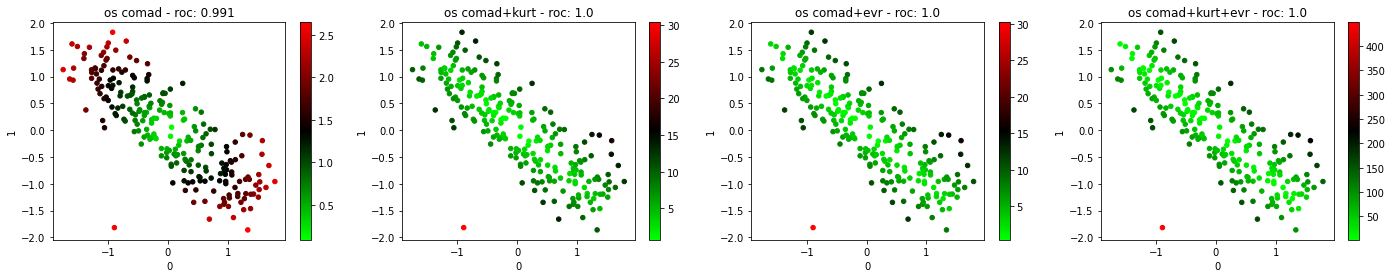

In [1]:
from src.cmoplus import CMOPlus
from sklearn.metrics import roc_auc_score
from src.utils.load_utils import load_local_mat
from sklearn.preprocessing import RobustScaler
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))}

cmap = mcolors.LinearSegmentedColormap('cmp', cdict, 100)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,4))

data = load_local_mat('./src/utils', 'testdata')
y = data.labels

Xdata = RobustScaler(with_centering=True, with_scaling=True, unit_variance=True).fit_transform(data.values)
cmp = CMOPlus(n_components=2)
cmp.fit(Xdata)

roc1 = roc_auc_score(y, cmp.accum_pc_outlier_scores_rawsc)
roc2 = roc_auc_score(y, cmp.accum_pc_outlier_scores_kurts)
roc3 = roc_auc_score(y, cmp.accum_pc_outlier_scores_evrsc)
roc4 = roc_auc_score(y, cmp.accum_pc_outlier_scores_kurts_evr)

pd.DataFrame(Xdata).plot.scatter(x=0, y=1, c=cmp.accum_pc_outlier_scores_rawsc, cmap=cmap, ax=ax1, title=f"os comad - roc: {round(roc1,3)}")
pd.DataFrame(Xdata).plot.scatter(x=0, y=1, c=cmp.accum_pc_outlier_scores_kurts, cmap=cmap, ax=ax2, title=f"os comad+kurt - roc: {round(roc2,3)}")
pd.DataFrame(Xdata).plot.scatter(x=0, y=1, c=cmp.accum_pc_outlier_scores_evrsc, cmap=cmap, ax=ax3, title=f"os comad+evr - roc: {round(roc3,3)}")
pd.DataFrame(Xdata).plot.scatter(x=0, y=1, c=cmp.accum_pc_outlier_scores_kurts_evr, cmap=cmap, ax=ax4, title=f"os comad+kurt+evr - roc: {round(roc4,3)}")